In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#7): Which is digit '3'


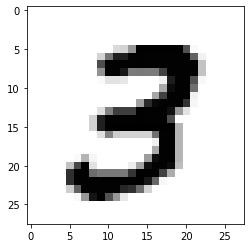

In [3]:
digit = 7 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

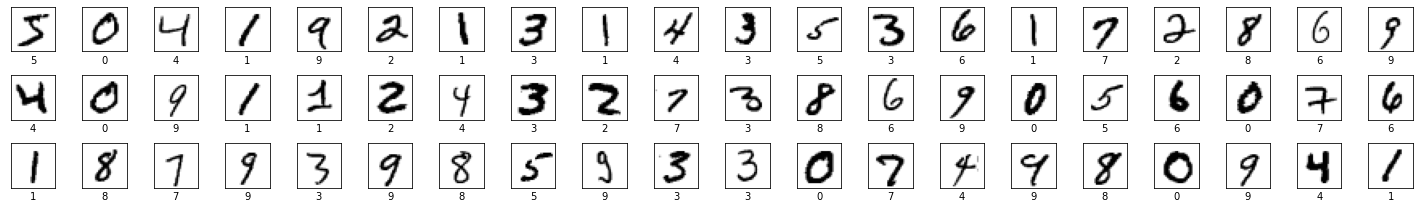

In [4]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [5]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

In [6]:
model = keras.Sequential([
    keras.Input(shape= 784),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,346
Trainable params: 118,346
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=x_train, y=y_train, epochs= 10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 [==============================] - 7s 11ms/step - loss: 0.3100 - accuracy: 0.9070 - val_loss: 0.1801 - val_accuracy: 0.9466
Epoch 2/10
657/657 [==============================] - 7s 11ms/step - loss: 0.1221 - accuracy: 0.9623 - val_loss: 0.1181 - val_accuracy: 0.9642
Epoch 3/10
657/657 [==============================] - 7s 10ms/step - loss: 0.0825 - accuracy: 0.9745 - val_loss: 0.1146 - val_accuracy: 0.9661
Epoch 4/10
657/657 [==============================] - 7s 11ms/step - loss: 0.0623 - accuracy: 0.9806 - val_loss: 0.1144 - val_accuracy: 0.9666
Epoch 5/10
657/657 [==============================] - 6s 10ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.1117 - val_accuracy: 0.9704
Epoch 6/10
657/657 [==============================] - 6s 10ms/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 0.1166 - val_accuracy: 0.9684
Epoch 7/10
657/657 [==============================] - 7s 10ms/step - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.1249 - val_accuracy: 0.9692

In [9]:
model.compile(
    optimizer= 'rmsprop',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
h = model.fit(x=x_train, y=y_train, epochs= 10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 [==============================] - 7s 11ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.1403 - val_accuracy: 0.9739
Epoch 2/10
657/657 [==============================] - 6s 9ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.1462 - val_accuracy: 0.9749
Epoch 3/10
657/657 [==============================] - 7s 10ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.2181 - val_accuracy: 0.9664
Epoch 4/10
657/657 [==============================] - 7s 10ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.1811 - val_accuracy: 0.9738
Epoch 5/10
657/657 [==============================] - 8s 12ms/step - loss: 0.0068 - accuracy: 0.9975 - val_loss: 0.2040 - val_accuracy: 0.9732
Epoch 6/10
657/657 [==============================] - 7s 11ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.1855 - val_accuracy: 0.9757
Epoch 7/10
657/657 [==============================] - 8s 12ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.2062 - val_accuracy: 0.9747


In [11]:
model.compile(
    optimizer= tf.keras.optimizers.SGD(),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
h = model.fit(x=x_train, y=y_train, epochs= 10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 [==============================] - 6s 10ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.2176 - val_accuracy: 0.9756
Epoch 2/10
657/657 [==============================] - 6s 10ms/step - loss: 2.1609e-04 - accuracy: 0.9999 - val_loss: 0.2163 - val_accuracy: 0.9762
Epoch 3/10
657/657 [==============================] - 6s 10ms/step - loss: 1.1466e-04 - accuracy: 1.0000 - val_loss: 0.2157 - val_accuracy: 0.9762
Epoch 4/10
657/657 [==============================] - 6s 10ms/step - loss: 9.4106e-05 - accuracy: 1.0000 - val_loss: 0.2153 - val_accuracy: 0.9762
Epoch 5/10
657/657 [==============================] - 6s 9ms/step - loss: 8.2922e-05 - accuracy: 1.0000 - val_loss: 0.2150 - val_accuracy: 0.9761
Epoch 6/10
657/657 [==============================] - 7s 11ms/step - loss: 7.5113e-05 - accuracy: 1.0000 - val_loss: 0.2148 - val_accuracy: 0.9759
Epoch 7/10
657/657 [==============================] - 7s 10ms/step - loss: 6.9229e-05 - accuracy: 1.0000 - val_loss: 0.2146

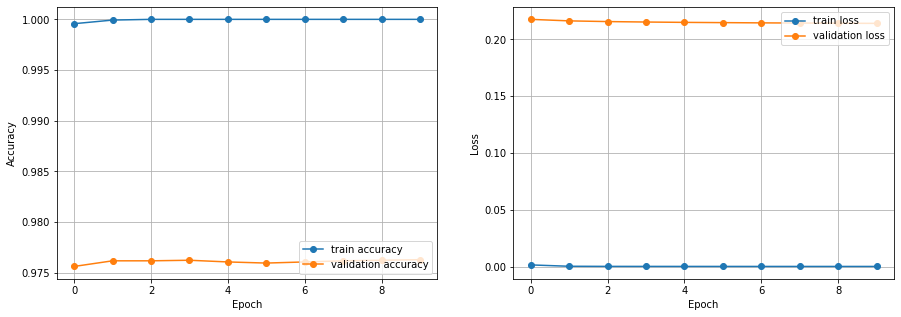

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [14]:
predictions = model.predict(x_test)


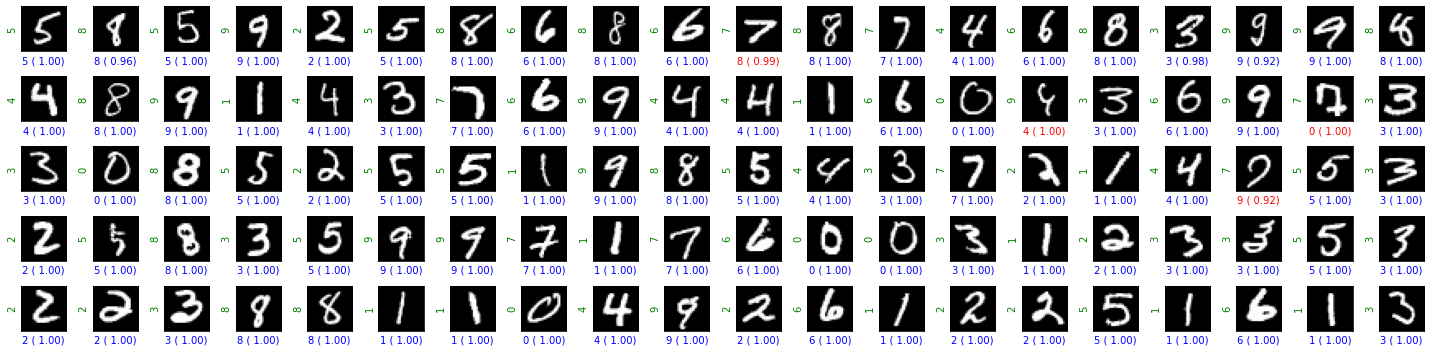

In [15]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [18]:
def test(i):
    img = x_test[i]
    predictions = model.predict([img.reshape(-1,784)])

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions) 
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

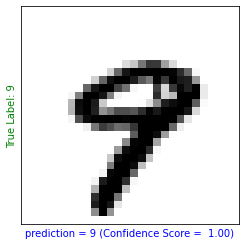

In [19]:
test(9)

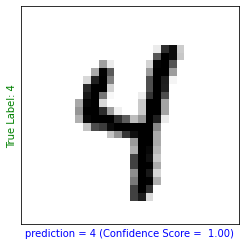

In [20]:
test(2012)

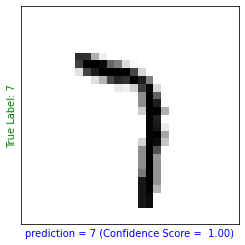

In [21]:
test(122)

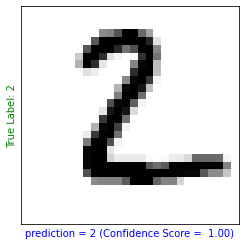

In [22]:
test(1)

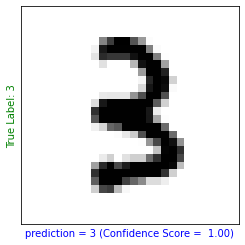

In [23]:
test(753)